# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_titanic_dataframe = pd.read_csv('train.csv')
test_titanic_dataframe = pd.read_csv('test.csv')

In [3]:
train_titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_titanic_dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_titanic_dataframe.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

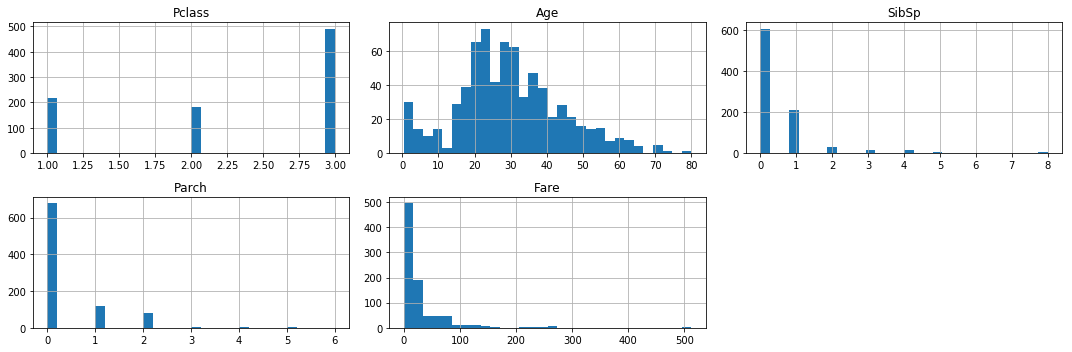

In [6]:
%matplotlib inline

default_no_bins = 30

plt.figure(figsize=(15, 5))
plt.subplot(2, 3, 1)
plt.title('Pclass')
train_titanic_dataframe['Pclass'].hist(bins=default_no_bins)
plt.subplot(2, 3, 2)
plt.title('Age')
train_titanic_dataframe['Age'].hist(bins=default_no_bins)
plt.subplot(2, 3, 3)
plt.title('SibSp')
train_titanic_dataframe['SibSp'].hist(bins=default_no_bins)
plt.subplot(2, 3, 4)
plt.title('Parch')
train_titanic_dataframe['Parch'].hist(bins=default_no_bins)
plt.subplot(2, 3, 5)
plt.title('Fare')
train_titanic_dataframe['Fare'].hist(bins=default_no_bins)
plt.tight_layout()

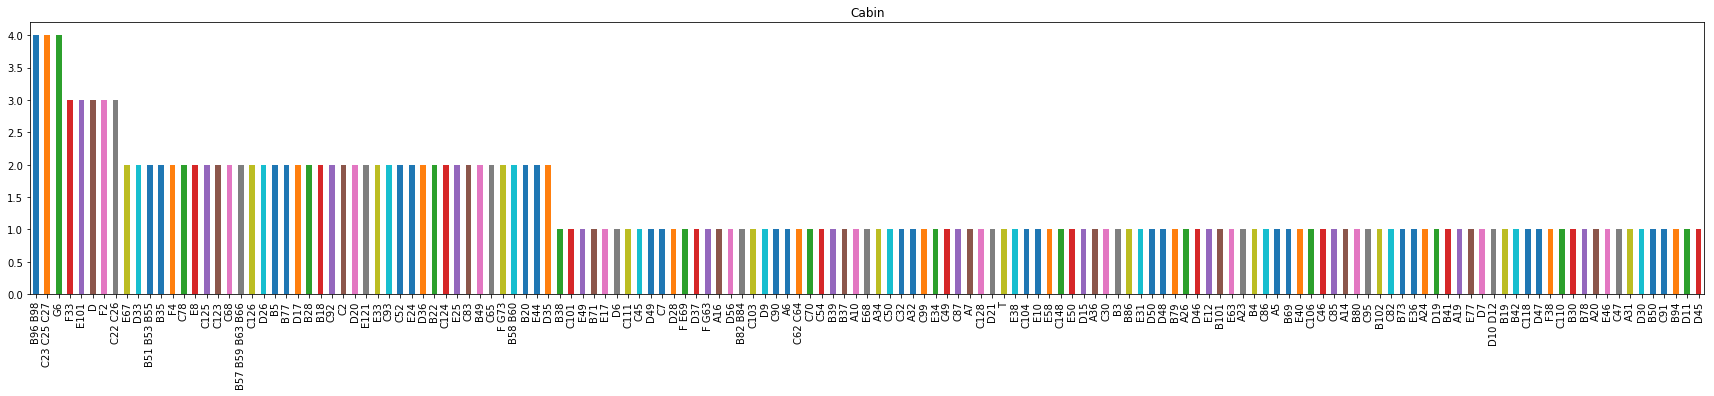

In [7]:
%matplotlib inline

plt.figure(figsize=(30, 5))
plt.title('Cabin')
train_titanic_dataframe['Cabin'].value_counts().plot(kind='bar')

# Data Preprocessing

In [42]:
def preprocess_data(titanic_dataframe):
    new_dataframe = pd.DataFrame()
    new_dataframe['PassengerId'] = titanic_dataframe['PassengerId']
    new_dataframe['Pclass'] = titanic_dataframe['Pclass']
    
    new_dataframe['sex_male'] = titanic_dataframe['Sex'].apply(lambda val: 1.0 if val == 'male' else 0.0)
    new_dataframe['sex_female'] = titanic_dataframe['Sex'].apply(lambda val: 1.0 if val == 'female' else 0.0)
    
    median_age = titanic_dataframe['Age'].median()
    new_dataframe['Age'] = titanic_dataframe['Age'].apply(lambda val: val if pd.isna(val) is False else median_age)
    new_dataframe['SibSp'] = titanic_dataframe['SibSp']
    new_dataframe['Parch'] = titanic_dataframe['Parch']
    new_dataframe['Fare'] = titanic_dataframe['Fare']
    
    new_dataframe['cabin_valid'] = titanic_dataframe['Cabin'].apply(lambda val: 1.0 if type(val) == str else 0.0)
    CABIN_SECTIONS = ['A','B','C','D','E','F','G','T']
    for cabin_section in CABIN_SECTIONS:
        new_dataframe['cabin_section_%s' % cabin_section] = titanic_dataframe['Cabin'].apply(lambda val: 1.0 if type(val) == str and val.split(' ')[0][0].lower() == cabin_section.lower() else 0.0)
    
    new_dataframe['embark_c'] = titanic_dataframe['Embarked'].apply(lambda val: 1.0 if type(val) == str and val.lower() == 'c' else 0.0)
    new_dataframe['embark_s'] = titanic_dataframe['Embarked'].apply(lambda val: 1.0 if type(val) == str and val.lower() == 's' else 0.0)
    new_dataframe['embark_q'] = titanic_dataframe['Embarked'].apply(lambda val: 1.0 if type(val) == str and val.lower() == 'q' else 0.0)
    new_dataframe['embark_valid'] = titanic_dataframe['Embarked'].apply(lambda val: 1.0 if type(val) == str and (val.lower() == 'c' or val.lower() == 's' or val.lower() == 'q') else 0.0)
    
    return new_dataframe

def preprocess_target(titanic_dataframe):
    new_dataframe = pd.DataFrame()
    new_dataframe['Survived'] = titanic_dataframe['Survived']
    
    return new_dataframe

In [43]:
train_titanic_dataframe_reindexed = train_titanic_dataframe.reindex(np.random.permutation(train_titanic_dataframe.index))

train_titanic_dataframe_data_prep = preprocess_data(train_titanic_dataframe_reindexed)
train_titanic_dataframe_target_prep = preprocess_target(train_titanic_dataframe_reindexed)
train_titanic_dataframe_data_prep.head()

,PassengerId,Pclass,sex_male,sex_female,Age,SibSp,Parch,Fare,cabin_valid,cabin_section_A,...,cabin_section_C,cabin_section_D,cabin_section_E,cabin_section_F,cabin_section_G,cabin_section_T,embark_c,embark_s,embark_q,embark_valid
395,396,3,1.0,0.0,22.0,0,0,7.7958,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
439,440,2,1.0,0.0,31.0,0,0,10.5000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
300,301,3,0.0,1.0,28.0,0,0,7.7500,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
625,626,1,1.0,0.0,61.0,0,0,32.3208,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
723,724,2,1.0,0.0,50.0,0,0,13.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [44]:
train_titanic_dataframe_data_prep.describe()

,PassengerId,Pclass,sex_male,sex_female,Age,SibSp,Parch,Fare,cabin_valid,cabin_section_A,...,cabin_section_C,cabin_section_D,cabin_section_E,cabin_section_F,cabin_section_G,cabin_section_T,embark_c,embark_s,embark_q,embark_valid
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.647587,0.352413,29.361582,0.523008,0.381594,32.204208,0.228956,0.016835,...,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.188552,0.722783,0.086420,0.997755
std,257.353842,0.836071,0.477990,0.477990,13.019697,1.102743,0.806057,49.693429,0.420397,0.128725,...,0.248802,0.188959,0.186182,0.119973,0.066890,0.033501,0.391372,0.447876,0.281141,0.047351
min,1.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,446.000000,3.000000,1.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,668.500000,3.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,891.000000,3.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
training_data = train_titanic_dataframe_data_prep.head(700)
training_targets = train_titanic_dataframe_target_prep.head(700)
training_data.describe()

,PassengerId,Pclass,sex_male,sex_female,Age,SibSp,Parch,Fare,cabin_valid,cabin_section_A,...,cabin_section_C,cabin_section_D,cabin_section_E,cabin_section_F,cabin_section_G,cabin_section_T,embark_c,embark_s,embark_q,embark_valid
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.0000,...,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.00000,700.000000,700.000000
mean,444.765714,2.308571,0.654286,0.345714,29.377143,0.504286,0.372857,31.515499,0.234286,0.0200,...,0.064286,0.034286,0.042857,0.017143,0.004286,0.001429,0.187143,0.72000,0.090000,0.997143
std,255.291904,0.834990,0.475941,0.475941,12.993241,1.069132,0.791301,47.704941,0.423854,0.1401,...,0.245437,0.182092,0.202680,0.129896,0.065372,0.037796,0.390305,0.44932,0.286386,0.053414
min,1.000000,1.000000,0.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,229.750000,2.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
50%,443.500000,3.000000,1.000000,0.000000,28.000000,0.000000,0.000000,13.860400,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000
75%,665.500000,3.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000
max,890.000000,3.000000,1.000000,1.000000,74.000000,8.000000,6.000000,512.329200,1.000000,1.0000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [46]:
validation_data = train_titanic_dataframe_data_prep.tail(200)
validation_targets = train_titanic_dataframe_target_prep.tail(200)
validation_data.describe()

,PassengerId,Pclass,sex_male,sex_female,Age,SibSp,Parch,Fare,cabin_valid,cabin_section_A,...,cabin_section_C,cabin_section_D,cabin_section_E,cabin_section_F,cabin_section_G,cabin_section_T,embark_c,embark_s,embark_q,embark_valid
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000,200.000000,200.0
mean,451.300000,2.310000,0.630000,0.370000,29.110850,0.595000,0.405000,35.240188,0.205000,0.005000,...,0.075000,0.045000,0.010000,0.005000,0.005000,0.0,0.195000,0.725000,0.080000,1.0
std,264.636415,0.841093,0.484016,0.484016,13.090023,1.220007,0.845309,57.138593,0.404715,0.070711,...,0.264052,0.207824,0.099748,0.070711,0.070711,0.0,0.397195,0.447635,0.271974,0.0
min,6.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0
25%,215.750000,2.000000,0.000000,0.000000,21.000000,0.000000,0.000000,7.925000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0
50%,447.500000,3.000000,1.000000,0.000000,28.000000,0.000000,0.000000,16.050000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.0
75%,681.000000,3.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.275000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.0
max,891.000000,3.000000,1.000000,1.000000,80.000000,8.000000,5.000000,512.329200,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.0


# Model

In [47]:
import math
import tensorflow as tf
from tensorflow.python.data import Dataset
from sklearn import metrics

tf.logging.set_verbosity(tf.logging.ERROR)

In [48]:
def construct_feature_columns(titanic_dataframe_data):
    feature_columns = []
    
    for column in titanic_dataframe_data:
        if column == 'PassengerId':
            continue
        else:
            feature_columns.append(tf.feature_column.numeric_column(column))
    
    return set(feature_columns)


def construct_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                            
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [49]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000001)
optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer, 5.0)

linear_classifier = tf.estimator.LinearClassifier(
    feature_columns=construct_feature_columns(training_data),
    optimizer=optimizer
)

In [50]:
training_input_fn = lambda: construct_input_fn(training_data, 
                                               training_targets,
                                               batch_size=100
                                              )

predict_training_input_fn = lambda: construct_input_fn(training_data, 
                                                       training_targets,
                                                       num_epochs=1
                                                      )

predict_validation_input_fn = lambda: construct_input_fn(validation_data, 
                                                         validation_targets,
                                                         num_epochs=1
                                                        )

In [51]:
period = 10
steps = 100
steps_per_period = steps / period

print('Training Model...')
for period in range(0, period):
    print('  Period %d' % period)
    linear_classifier.train(input_fn=training_input_fn, steps=steps_per_period)

Training Model...
  Period 0
  Period 1
  Period 2
  Period 3
  Period 4
  Period 5
  Period 6
  Period 7
  Period 8
  Period 9


In [52]:
training_predictions = linear_classifier.predict(input_fn=predict_training_input_fn)
training_predictions = np.array([int(item['classes'][0]) for item in training_predictions])

validation_predictions = linear_classifier.predict(input_fn=predict_validation_input_fn)
validation_predictions = np.array([int(item['classes'][0]) for item in validation_predictions])

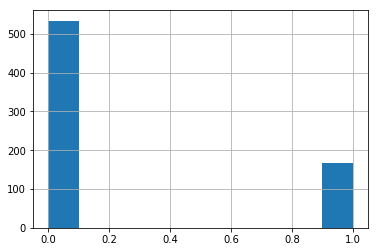

In [53]:
pd.Series(training_predictions).hist()

In [54]:
predictions = pd.DataFrame()
predictions['training_targets'] = training_targets
predictions['training_predictions'] = training_predictions
predictions

,training_targets,training_predictions
0,0.0,0
1,1.0,0
2,1.0,0
3,1.0,0
4,0.0,0
5,NaN,1
6,0.0,0
7,NaN,0
8,1.0,0
9,NaN,0


In [55]:
print('Root Mean Square (training data): %f' % math.sqrt(metrics.mean_squared_error(training_predictions, training_targets)))
print('Root Mean Square (validation data): %f' % math.sqrt(metrics.mean_squared_error(validation_predictions, validation_targets)))

Root Mean Square (training data): 0.638077
Root Mean Square (validation data): 0.663325
